# Twitter Sentiment Analysis using NLTK

We will:
- Load sample tweets dataset from NLTK (`twitter_samples`)
- Preprocess the text (lowercase, remove stopwords, tokenize)
- Apply **VADER** sentiment analyzer
- Visualize positive vs negative counts


In [7]:
import nltk
from nltk.corpus import twitter_samples, stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Download required datasets
nltk.download('twitter_samples')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

# Load positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

print("Number of positive tweets:", len(positive_tweets))
print("Number of negative tweets:", len(negative_tweets))


[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\shahz\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shahz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shahz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shahz\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Number of positive tweets: 5000
Number of negative tweets: 5000


## Preprocessing Tweets
We:
- Lowercase all text
- Tokenize
- Remove stopwords


In [8]:
stop_words = set(stopwords.words("english"))

# Extra download fix
nltk.download('punkt_tab')

def preprocess_tweet(tweet):
    tokens = word_tokenize(tweet.lower())
    clean_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(clean_tokens)

# Example before & after
print("Original:", positive_tweets[0])
print("Processed:", preprocess_tweet(positive_tweets[0]))


Original: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
Processed: followfriday pkuchly57 top engaged members community week


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shahz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Sentiment Analysis with VADER
We use **SentimentIntensityAnalyzer** to score tweets as positive/negative/neutral.


In [9]:
sia = SentimentIntensityAnalyzer()

def get_sentiment(tweet):
    score = sia.polarity_scores(tweet)["compound"]
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

# Test on a few tweets
print(positive_tweets[0], "->", get_sentiment(positive_tweets[0]))
print(negative_tweets[0], "->", get_sentiment(negative_tweets[0]))


#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :) -> positive
hopeless for tmr :( -> negative


## Apply Sentiment Analysis on the Dataset
We analyze **all tweets** and count how many are positive, negative, or neutral.


In [10]:
# Combine tweets into one dataset
all_tweets = positive_tweets + negative_tweets

# Preprocess + analyze
results = [get_sentiment(preprocess_tweet(tweet)) for tweet in all_tweets]

# Count results
from collections import Counter
sentiment_counts = Counter(results)
print(sentiment_counts)


Counter({'positive': 4862, 'neutral': 3268, 'negative': 1870})


## Visualization
We plot sentiment distribution using a bar chart.


C:\Users\shahz\AppData\Local\Temp\ipykernel_27064\613541040.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sentiment_counts.keys()), y=list(sentiment_counts.values()), palette="coolwarm")


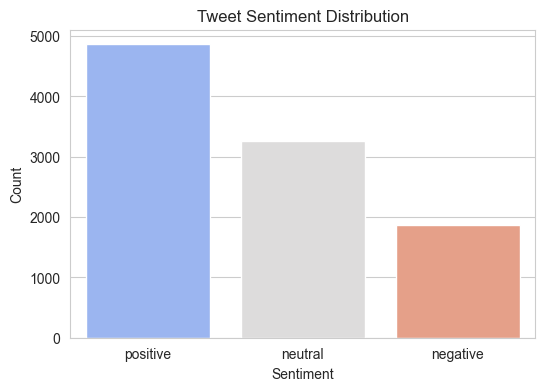

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.barplot(x=list(sentiment_counts.keys()), y=list(sentiment_counts.values()), palette="coolwarm")
plt.title("Tweet Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
